# Working With Time Series in Pandas

In this lesson, we will talk about how to work with time series data with pandas
dataframes.

## Converting to DateTime Type

Thus far we have discuessed numeric and string datatypes in pandas dataframes,
but pandas has a special type for dates as well.

To convert an existing string value or values to a datetime type, we can use the
`to_datetime` function from the pandas module.

In [1]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

By default pandas will try to infer the date format, but there may be be cases
where pandas can't figure out the format itself, and we'd have to help out.

In [2]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown datetime string format, unable to parse: Jan:1:1970, at position 0


Here we can specify a **format string** to tell pandas explicitly how to convert
this date.

In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In addition to clarifying date format ambiguity, adding the `format=` keyword argument can significantly speed up the processing of larger datasets with non-standard formats.

In addition to single strings, `pd.to_datetime` will work with entire columns at a time.

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [5]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Working with DateTime Series

The `.dt` accessor can be used to access various properties of a date. Some of the more common ones are listed here, and you can reference the pandas documentation for a full list.

| Property         | Description                                                       |
| --------         | -----------                                                       |
| year             | The year of the datetime                                          |
| month            | The month of the datetime                                         |
| day              | The days of the datetime                                          |
| hour             | The hour of the datetime                                          |
| week             | The week ordinal of the year                                      |
| weekday          | The number of the day of the week with Monday=0, Sunday=6         |
| weekday_name     | The name of the day in a week (ex: Friday)                        |
| quarter          | Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.               |

In addition to the properties listed above, we can use the `strftime` method and give date string to format the date in a custom way (more on this later).

!!!warning "Pandas Versions"
    While most of the changes introduced in pandas v1 are backwards compatible with previous versions, the way day names are accessed is different.
    
    In pandas before version 1.0, use the `.weekday_name` property. In pandas after version 1.0 use the `.day_name()` **function**.
    
    You can check your version of pandas like so:
    
    ```python
    import pandas as pd
    
    print(pd.__version__)
    ```

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [7]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

## DateTime Indexes

Once we have a date-time column on a dataframe, we can use that column as the
index on our dataframe.

In [8]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


!!!warning "Sort Time Data"
    You should sort the dataframe by the datetime field before doing any
    date-related manipulations, otherwise they could have undefined behavior.

Having a datetime index on our dataframe allows us to use a lot of time series
specific functionality within pandas. All of the functionality we'll discuss in
the rest of this lesson requires a dataframe with a datetime index.

First let's take a look at the start and end of our data:

In [9]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

!!!note "Datetime Properties"
    All of the properties previously discussed available through the datetime accessor are available directly on datetime index objects. That is if you have a dataframe with a `date` column,
    
    ```python
    df.date.dt.year
    ```
    
    Will give you the same result as
    
    ```python
    df.index.year
    ```
    
    If `date` has been set as the index in the second code example.

With a datetime index we can access specific subsets of the data like so:

In [10]:
df.loc['2019-05']

,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [11]:
df['2019-05-06':'2019-05-16'] # NB. inclusive

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


Note that unlike list slicing syntax, slicing with dates in the example above is inclusive of the upper bound.

### Changing the Period

Notice that all of the days aren't one after another, there are some gaps in our data. Often times it is the case that we want a uniform amount of time between observations in each row. In addition, there are times where we might wish to either increase or decrease the granularity of our data.

- **Upsampling**: resampling our data such that it is at a smaller time window, increasing the number of data points
- **Downsampling**: resampling our data such that it is at a larger time window, decreasing the number of data points

For example, changing our data from weekly to daily frequency is upsampling. This will introduce null values as we are adding data points where there were previously none. Common ways to deal with the introduced nulls are filling with 0, back filling, forward filling, or interpolation. Changing our data from weekly to monthly frequency is an example of downsampling. Here we need to provide a method of aggregation to combine the datapoints into a smaller set.

One way to accomplish this is with the `.asfreq` method.

In [12]:
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


Notice here several things have changed:

- We now have a larger number of rows
- Each date is one day greater than the next
- We introduced some nulls into our data

Now our data represents an entire year, but we introduced NaNs where we were
missing data.

### Filling Missing Values

Pandas contains some special methods for filling missing values in time series
data. We can either fill the missing values with a specified value (like we've
seen in the past), or we can fill with the value from the previous observation
(a **forward fill**), or the value from the next observation (a **back fill**).

In [13]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In this case we might assume that the missing days are weekends where no coffee was consumed and fill with 0s.

In [14]:
df = df.fillna(0)

### Resampling

Resampling can be thought of as a sort of group by operation, but using a date
component to do the grouping. It is similar in functionality to the `.asfreq`
method, but allows more flexibility. Note that a resample only works on
dataframes with a datetime index.

Like a group by, once our data is resampled, we must specify an aggregation
operation.

For example, to get the average coffee consumption over time:

In [15]:
df.resample('3W').mean() # Every 3 weeks

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


To get the total coffee consumption for each month:

In [16]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


You can reference the pandas documentation for a full list of valid resampling periods.

## Plotting

We'll discuss further visualization techniques in the exploration lesson, but pandas makes it very easy to plot time series data. Columns in a dataframe with a datetime index will be plotted as lines with time on the x-axis by simply calling `.plot`.

<Axes: xlabel='date'>

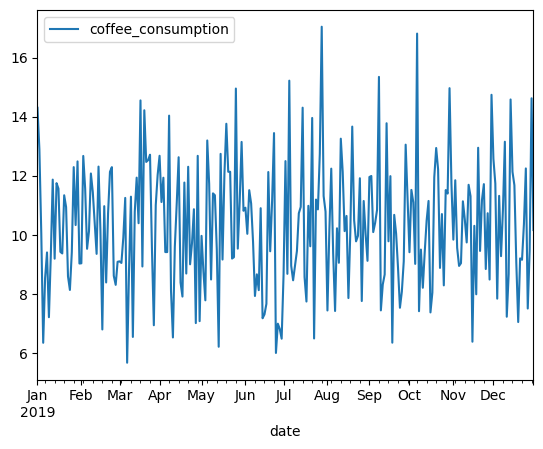

In [17]:
df.plot()

This will work with the results of a resample as well:

<Axes: xlabel='date'>

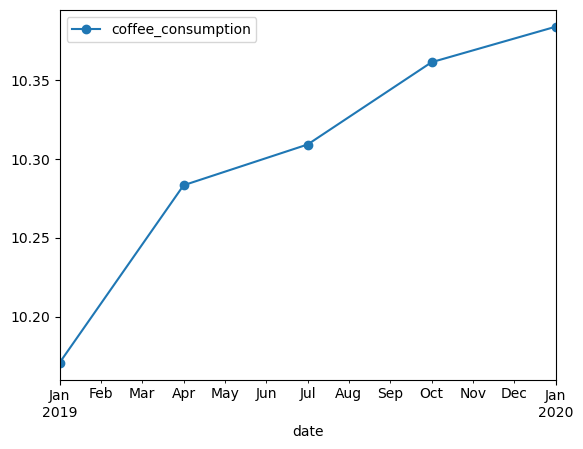

In [18]:
df.resample('3M').mean().plot(marker='o')

### Rolling Windows

The `.rolling` method can be used to calculate rolling averages. A rolling
average lets us answer questions like: what was the average over the last 3
days? For every day in our dataset.

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
2019-02-10,11.195485,10.508418,10.213512,NaN
2019-02-17,10.730911,10.855301,10.504252,10.385805
2019-02-24,9.808429,10.578275,10.412919,10.229557
2019-03-03,9.486304,10.008548,10.372127,10.259428


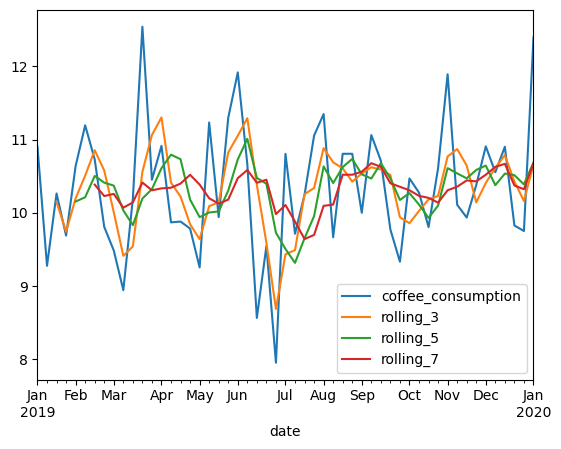

In [19]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

We could also apply other aggregations with the .rolling method if we wanted:

In [20]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.134728
2019-02-03,39.872077
2019-02-10,41.790351
2019-02-17,42.256164
2019-02-24,42.374333
2019-03-03,41.221128


### Lagging and Lead

- `.shift`: move the data backwards and forwards by a given amount
- `.diff`: find the difference with the previous observation (or a specified
  further back observation)

In [21]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
2019-01-08,9.410101,7.219271,8.545563,10.046015,0.864539,-0.635914
2019-01-09,7.219271,9.338456,9.410101,6.354805,-2.190831,0.864465
2019-01-10,9.338456,11.872667,7.219271,8.545563,2.119186,0.792894
2019-01-11,11.872667,9.198816,9.338456,9.410101,2.534210,2.462566


In [22]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

## Strftime

The `strftime` method can be used to format dates in a custom way using **format specifiers**.

In [23]:
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

Here the `%B` means the full month name, `%d` means the 2-digit day and `%Y` means the 4-digit year.

See [the python documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for a full listing of format specifiers.

## Timezones

- To add a timezone to data that has none, use `tz_localize`. For central time: `tz_localize("America/Chicago")`
- `.tz_localize(None)` will remove a timezone
- `.tz_convert` can be used to convert data from one timezone to another
- `df.index.tz is None` to check if a dataframe has a timezone set

## Timedeltas

We can use pandas to calculate how much time has elapsed between 2 data points. For example, let's calculate how many days it was between codeup's first data science cohort start date and graduation date.

In [24]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

To convert this Timedelta object to a number:

In [25]:
days_between // pd.Timedelta('1d')

130

This will also work with multiple dates at once. For example, we can calculate how many days it was between the last date in a dataset and each data point like so:

In [26]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1


## Further Reading

- [Pandas date frequency strings](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)
- [`strftime` cheatsheet](https://zach.lol/strftime.html)

## Exercises

For all of the datasets below, examine the data types of each column, ensure
that the dates are in the proper format, and set the dataframe's index to the
date column as appropriate.

For this exercise you'll need to install a library that will provide us access
to some more datasets:

```
pip install vega_datasets
```

You can use this library like so:

```python
from vega_datasets import data
```


---

Call the sf_temps() dataset from the vega_datasets library like so:  

```python
data.sf_temps()
```

Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average
   temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.
1. Which month is the coldest, on average?
1. Which month has the highest average temperature?
1. Resample by the day and calculate the min and max temp for the day (Hint:
   `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change
   in temperature for the day. Which month has the highest daily temperature
   variability?
1. **Bonus**: Visualize the daily min, average, and max temperature over time on a
   single line plot, i.e. the min, average, and maximum temperature should be 3
   seperate lines.

---

```python
data.seattle_weather()
```

Use the above dataset for the following exercises:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is
   appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days
   where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of
   precipitation?

---

```python
data.flights_20k()
```

Use the above dataset for the following exercises:

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

---

### Bonus

```python
data.iowa_electricity()
```

Use the above dataset for the following exercises:

1. For each row, calculate the percentage of the year's total that energy source
   provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows
   (Hint: `df.pivot_table`)
4. Make a line plot that shows the amount of energy generated over time. Each
   source should be a separate line?
5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when
      considering how much energy is coming from each source?
    - express each number as a % of the year's total

---

1. Use the `sf_temps` dataset
1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use
   `pd.cut` or `pd.qcut` for this)
1. How does the occurances of these 4 categories change month over month? i.e.
   how many days have each distinction? Visualize this and give the visual
   appropriate colors for each category.
1. Create pretty labels for time plots
1. Visualize the number of days of each month that fall into each bin by year
   (e.g. x=month, y=n_days, hue=temp_bin) or st similar

---

Explore the `birdstrikes` dataset.

```python
df = data.birdstrikes()
```
